EXPLORATORY DATA ANALYSIS OF DIAMONDS PRICING

IMPORT LIBRARIES


In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
import pandas as pd
import numpy as np
data=pd.read_csv('E:/Documents/Personal Learning/MSC Data Science 2023/DiamondPricesData.csv')

# Removing duplicate rows if any
data_new=data.drop_duplicates()

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
data_new.head(10)

Shape After deleting duplicate values: (53794, 10)


,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
5,336,0.24,Very Good,J,VVS2,NaN,57.0,3.94,3.96,2.48
6,336,0.24,Very Good,I,VVS1,62.3,57.0,3.95,3.98,2.47
7,337,0.26,Very Good,H,SI1,61.9,55.0,4.07,4.11,2.53
8,337,0.22,Fair,E,VS2,65.1,61.0,3.87,3.78,2.49
9,338,0.23,Very Good,H,VS1,59.4,61.0,4.00,4.05,2.39


Defining the problem statement:
Create a ML model which can predict the price of a diamond
Target Variable: price
Predictors: color, cut, carat etc.

Determining the type of Machine Learning
Based on the problem statement you can understand that we need to create a supervised ML Regression model, as the target variable is Continuous.

Looking at the distribution of Target variable
If target variable's distribution is too skewed then the predictive modeling will not be possible.
Bell curve is desirable but slightly positive skew or negative skew is also fine
When performing Regression, make sure the histogram looks like a bell curve or slight skewed version of it. Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios.

<AxesSubplot: >

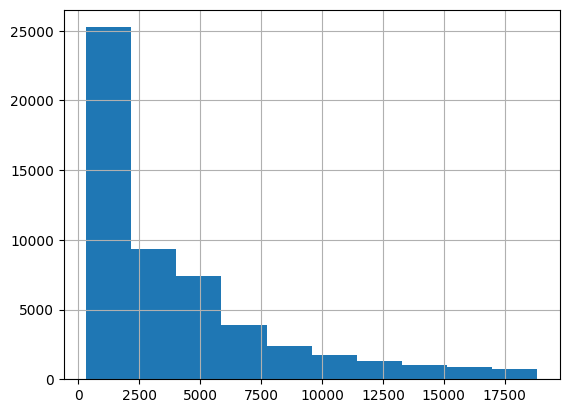

In [3]:
%matplotlib inline
# Creating Bar chart as the Target variable is Continuous
data_new['price'].hist()

In [4]:
# Looking at the descriptive statistics of the data
data_new.describe(include='all')

,price,carat,cut,color,clarity,depth,table,x,y,z
count,53794.000000,53794.00000,53794,53788,53794,53780.000000,53794.000000,53794.000000,53794.000000,53794.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,21488,11256,13032,NaN,NaN,NaN,NaN,NaN
mean,3933.065082,0.79778,NaN,NaN,NaN,61.748154,57.458109,5.731214,5.734653,3.538714
std,3988.114460,0.47339,NaN,NaN,NaN,1.429948,2.233679,1.120695,1.141209,0.705037
min,326.000000,0.20000,NaN,NaN,NaN,43.000000,43.000000,0.000000,0.000000,0.000000
25%,951.000000,0.40000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2401.000000,0.70000,NaN,NaN,NaN,61.800000,57.000000,5.700000,5.710000,3.530000
75%,5326.750000,1.04000,NaN,NaN,NaN,62.500000,59.000000,6.540000,6.540000,4.030000


Visual Exploratory Data Analysis

Categorical variables: Bar plot

Continuous variables: Histogram

In [5]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

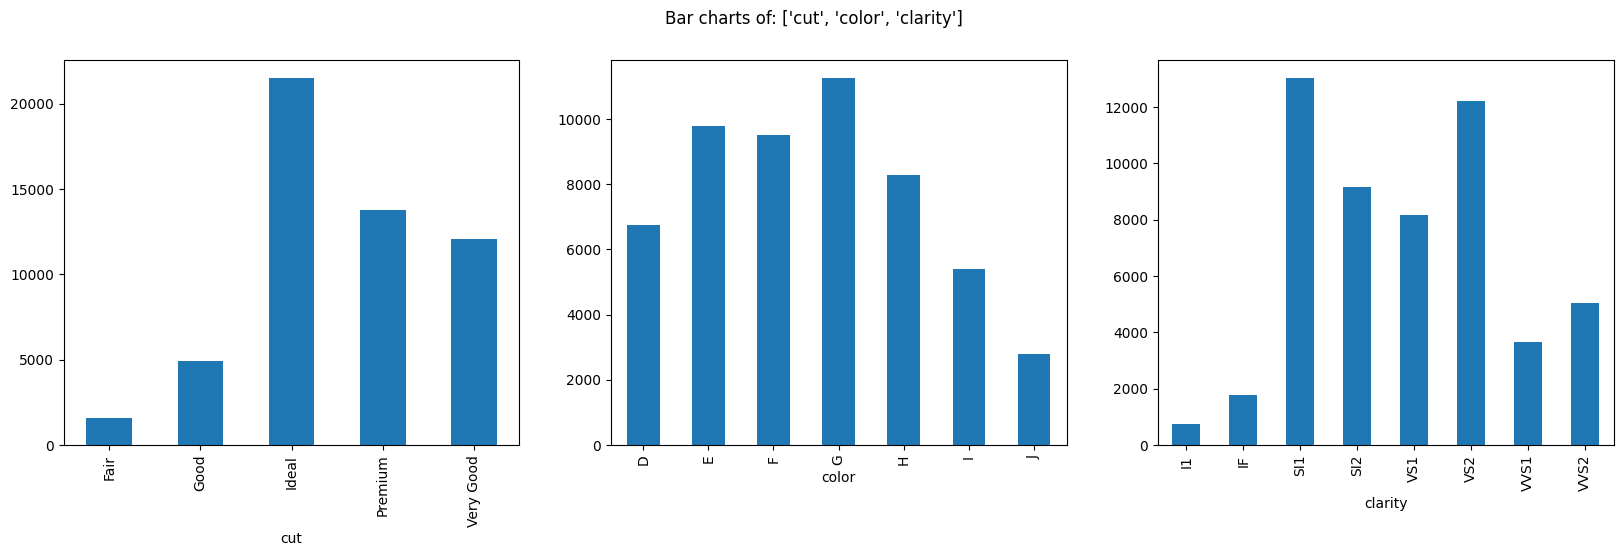

In [6]:
# Calling the function
PlotBarCharts(inpData=data_new, colsToPlot=['cut', 'color', 'clarity'])

array([[<AxesSubplot: title={'center': 'carat'}>,
        <AxesSubplot: title={'center': 'depth'}>],
       [<AxesSubplot: title={'center': 'table'}>,
        <AxesSubplot: title={'center': 'x'}>],
       [<AxesSubplot: title={'center': 'y'}>,
        <AxesSubplot: title={'center': 'z'}>]], dtype=object)

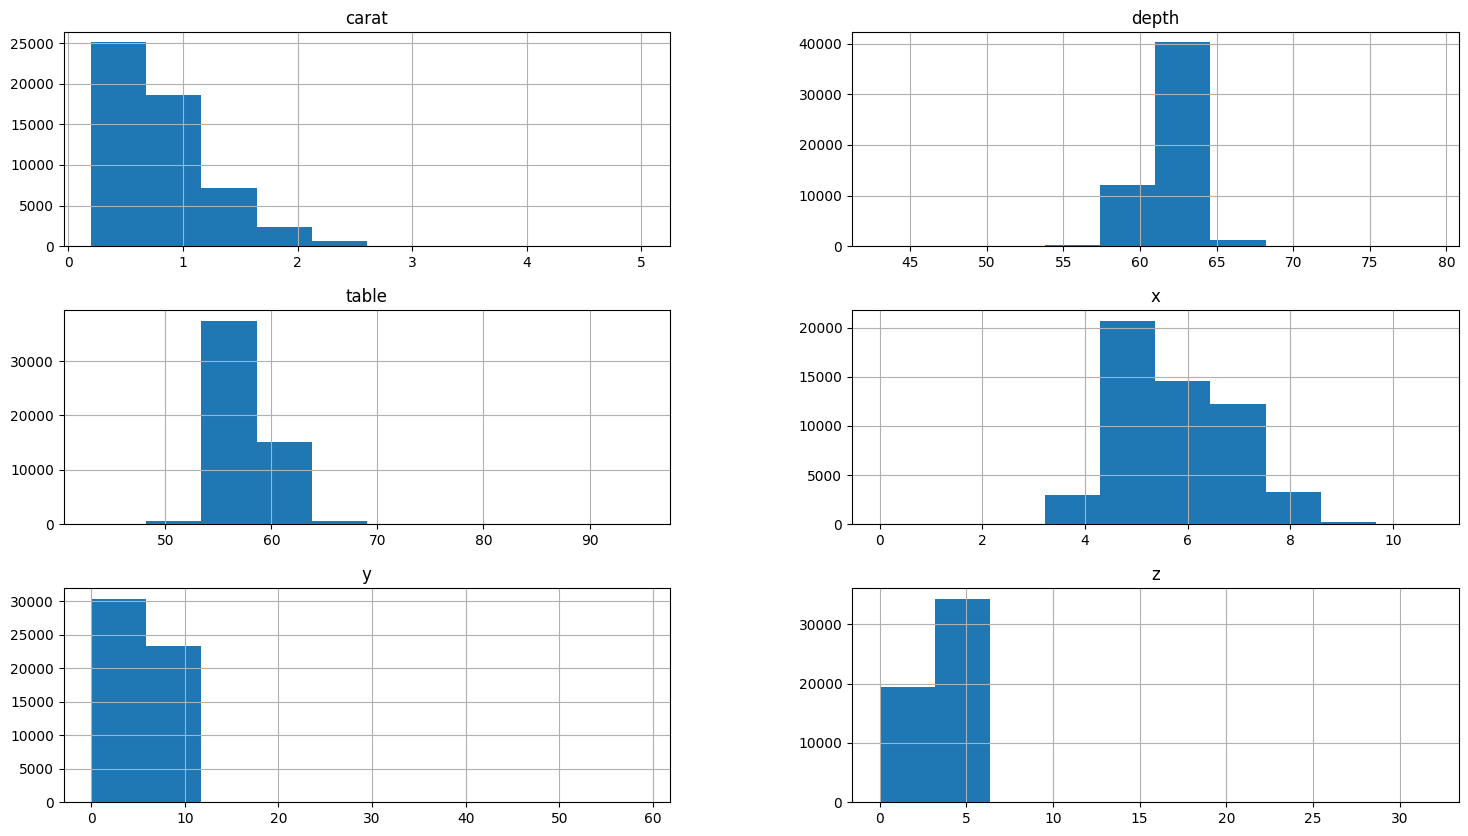

In [7]:
# Plotting histograms of multiple columns together
data_new.hist(['carat', 'depth', 'table', 'x','y','z'], figsize=(18,10))

Handling Outliers

In [8]:
#Replacing outliers for 'x'
# Finding nearest values to 2 mark
data_new['x'][data_new['x']>2].sort_values(ascending=True)

31596     3.73
31600     3.73
31598     3.74
31599     3.76
31601     3.77
         ...  
26444    10.01
25999    10.02
25998    10.14
27630    10.23
27415    10.74
Name: x, Length: 53787, dtype: float64

In [9]:
# Finding nearest values to 20 mark
data_new['y'][data_new['y']<20].sort_values(ascending=False)

27415    10.54
27630    10.16
25998    10.10
26444     9.94
25999     9.94
         ...  
26243     0.00
11963     0.00
24520     0.00
15951     0.00
49556     0.00
Name: y, Length: 53792, dtype: float64

Above result shows the nearest logical value is 10.54, hence, replacing any value above 20 with it.

In [10]:
# Replacing outliers with nearest possibe value
data_new['y'][data_new['y']>20] =10.54

In [11]:
# Finding nearest values to 10 mark
data_new['z'][data_new['z']<10].sort_values(ascending=False)

24067    8.06
27415    6.98
27630    6.72
27130    6.43
23644    6.38
         ... 
49556    0.00
4791     0.00
26123    0.00
5471     0.00
13601    0.00
Name: z, Length: 53793, dtype: float64

Above result shows the nearest logical value is 6.98, hence, replacing any value above 8 with it.

In [12]:
# Replacing outliers with nearest possibe value
data_new['z'][data_new['z']>8] =6.98

Visualising outlier treatment


array([[<AxesSubplot: title={'center': 'x'}>,
        <AxesSubplot: title={'center': 'y'}>],
       [<AxesSubplot: title={'center': 'z'}>, <AxesSubplot: >]],
      dtype=object)

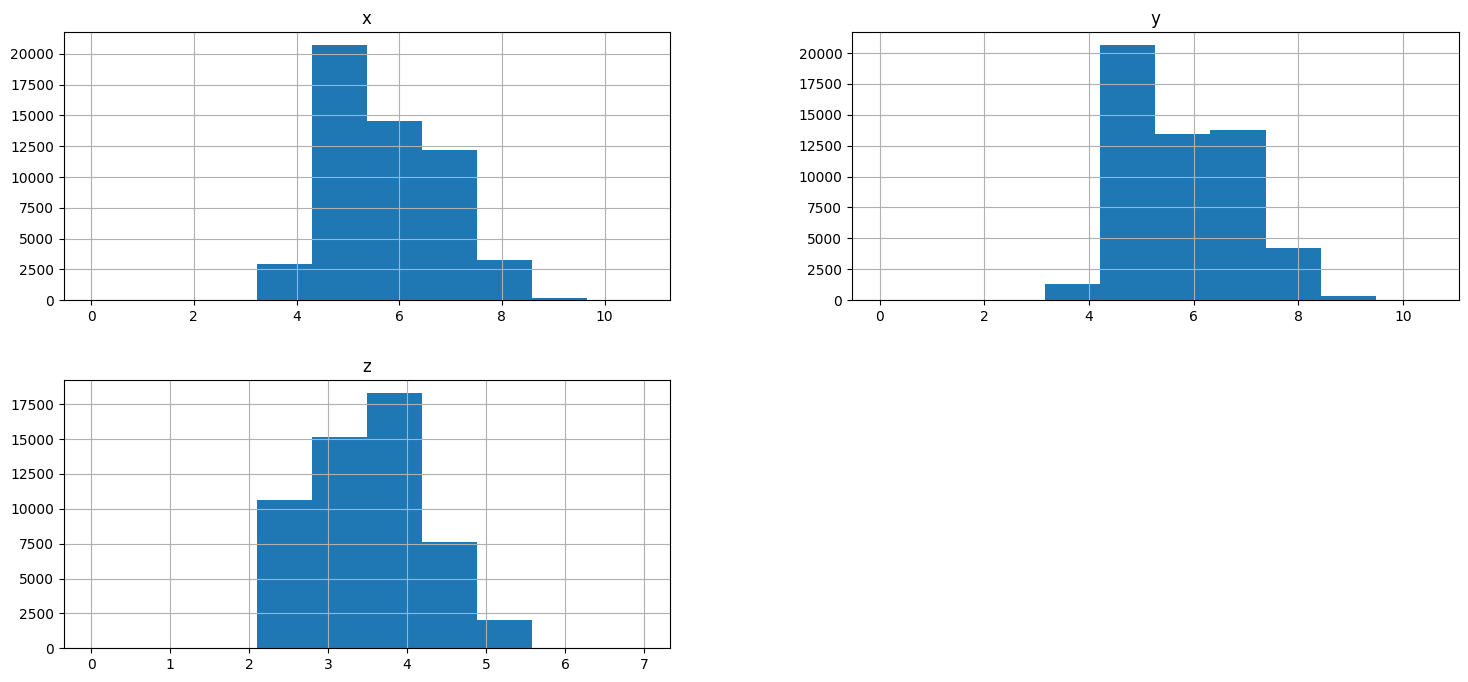

In [13]:
# Plotting the histogram
data_new.hist(['x','y', 'z'], figsize=(18,8))

array([[<AxesSubplot: title={'center': 'x'}>,
        <AxesSubplot: title={'center': 'y'}>],
       [<AxesSubplot: title={'center': 'z'}>, <AxesSubplot: >]],
      dtype=object)

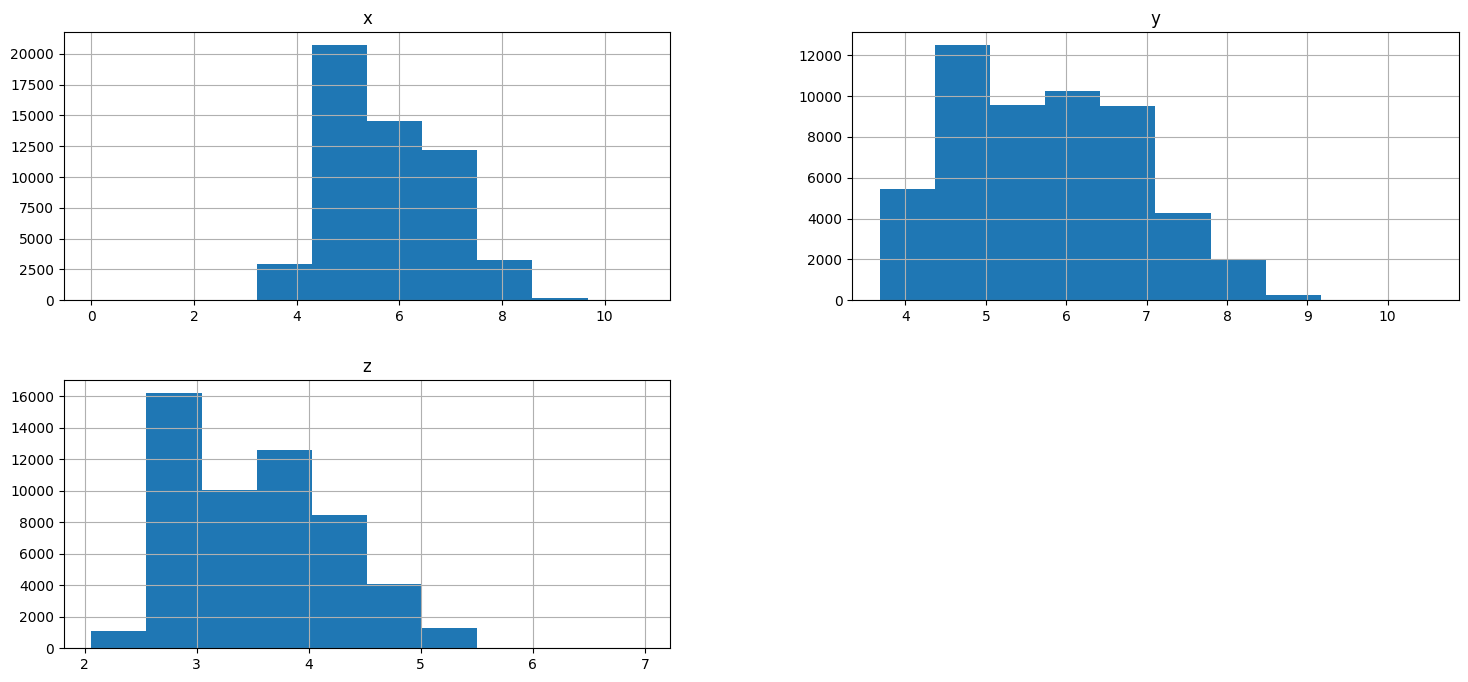

In [14]:
 #Finding nearest value beyond 2
data_new['y'][data_new['y']>2].sort_values(ascending=True)

# Replacing outliers with nearest possibe value
data_new['y'][data_new['y']<2] =3.68

# Finding nearest value beyond 2
data_new['z'][data_new['z']>2].sort_values(ascending=True)

# Replacing outliers with nearest possibe value
data_new['z'][data_new['z']<2] =2.06

# Plotting the histogram
data_new.hist(['x','y', 'z'], figsize=(18,8))


Handling missing data


In [15]:
# Replacing missing value for categorical data using MODE value
data_new['color'].fillna(value=data_new['color'].mode()[0], inplace=True)

# Replacing missing value for continuous data using median value
data_new['depth'].fillna(value=data_new['depth'].median(), inplace=True)

# Checking missing values again after treatment
data_new.isnull().sum()

price      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

Exploring Relationships between features


Visual exploration of relationship between variables

Continuous Vs Continuous ---- Scatter Plot

Categorical Vs Continuous---- Box Plot

Categorical Vs Categorical---- Grouped Bar Plots

Statistical measurement of relationship strength between variables

Continuous Vs Continuous ---- Correlation matrix

Categorical Vs Continuous---- ANOVA test

Categorical Vs Categorical--- Chi-Square test

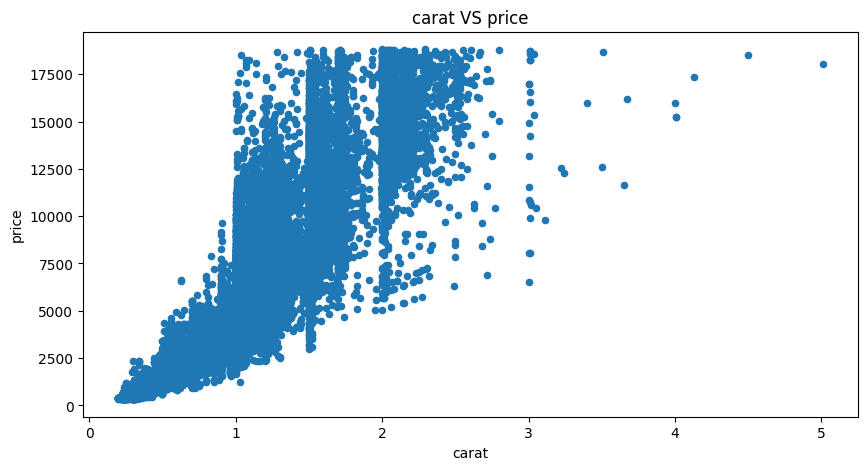

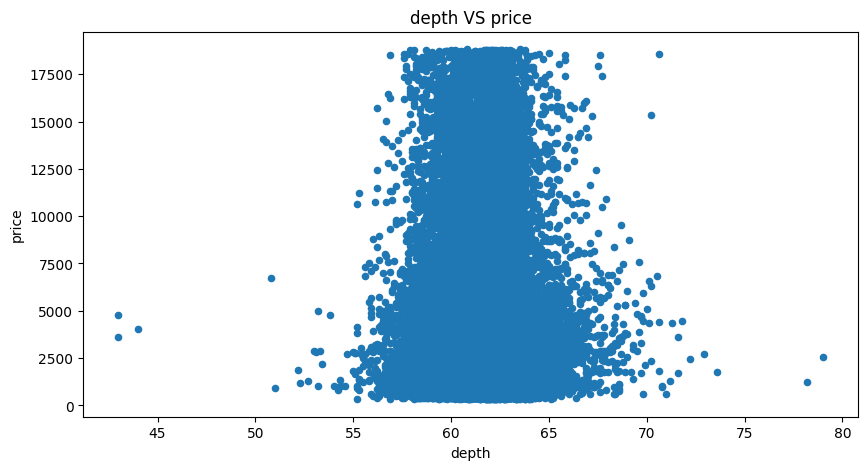

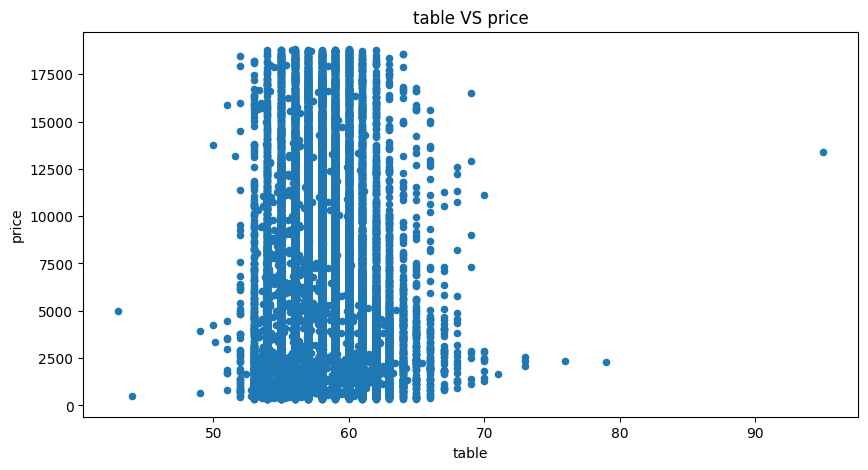

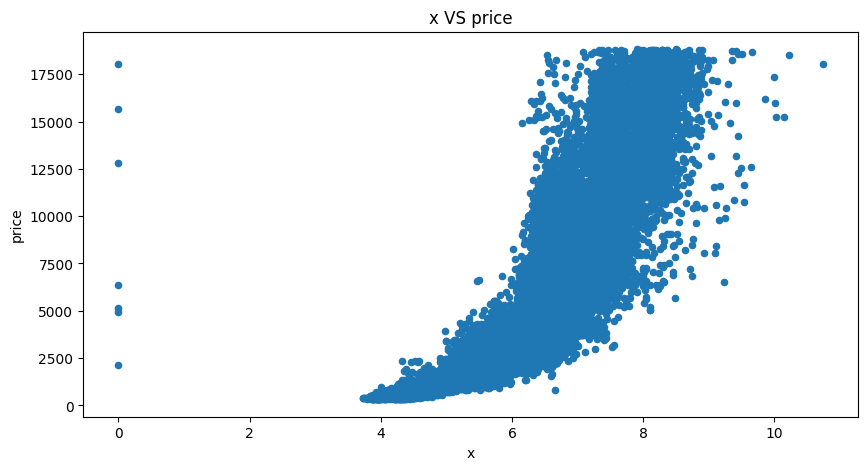

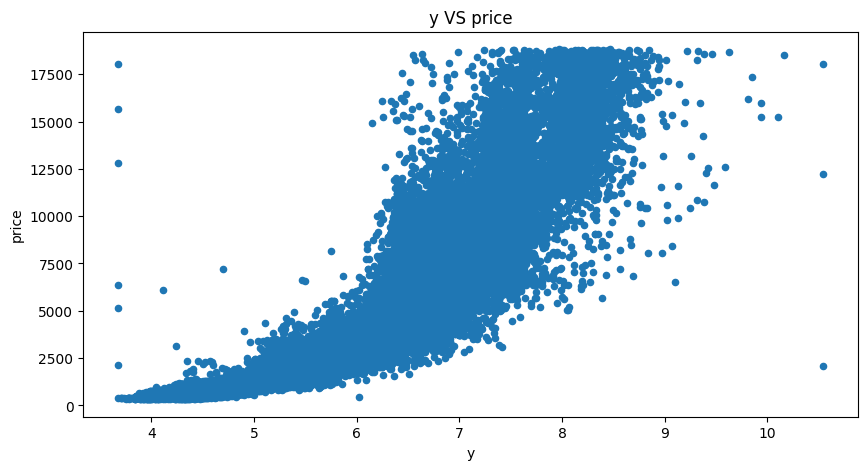

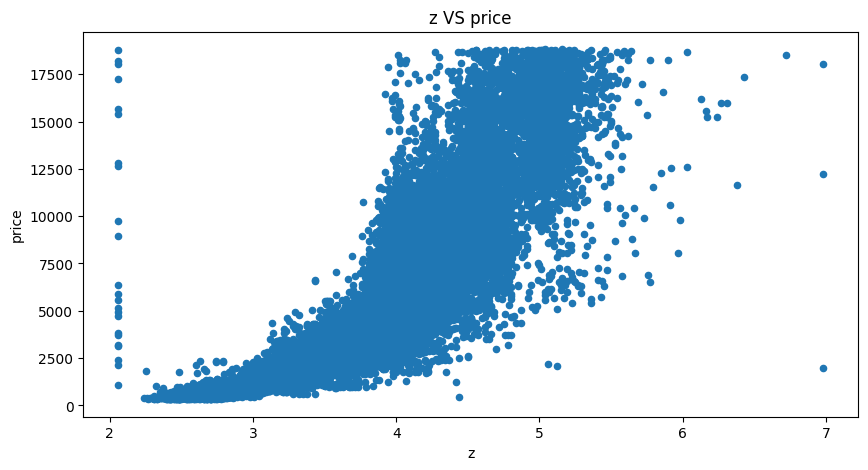

In [16]:
ContinuousCols=['carat', 'depth', 'table', 'x','y','z']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    data_new.plot.scatter(x=predictor, y='price', figsize=(10,5), title=predictor+" VS "+ 'price')

GRAPH INTERPRETATION

Trend. 
You should try to see if there is a visible trend or not. There could be three scenarios

Increasing Trend: This means both variables are positively correlated. In simpler terms, they are directly proportional to each other, if one value increases, other also increases. This is good for ML!

Decreasing Trend: This means both variables are negatively correlated. In simpler terms, they are inversely proportional to each other, if one value increases, other decreases. This is also good for ML!

No Trend: You cannot see any clear increasing or decreasing trend. This means there is no correlation between the variables. Hence the predictor cannot be used for ML.

Based on this chart you can get a good idea about the predictor, if it will be useful or not. You confirm this by looking at the correlation value.

In [17]:
# Creating a data filter to remove outliers from data
DataFilter=(data_new['z']>2.06) & (data_new['z']<6.5)
data_new=data_new[DataFilter]

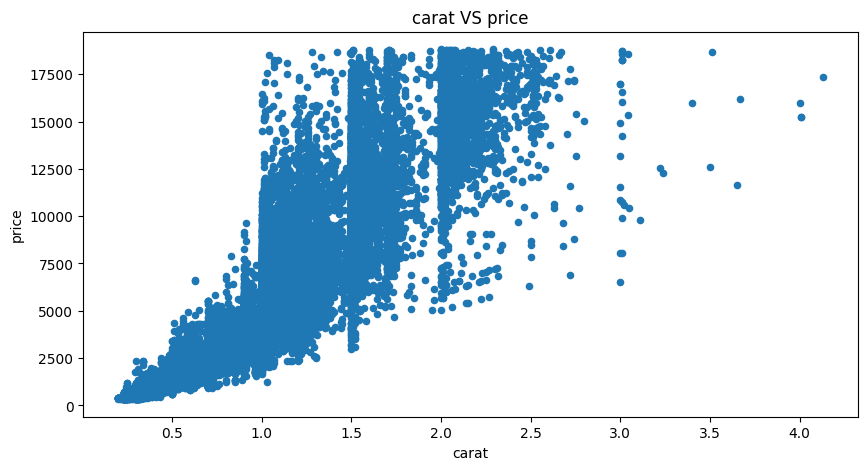

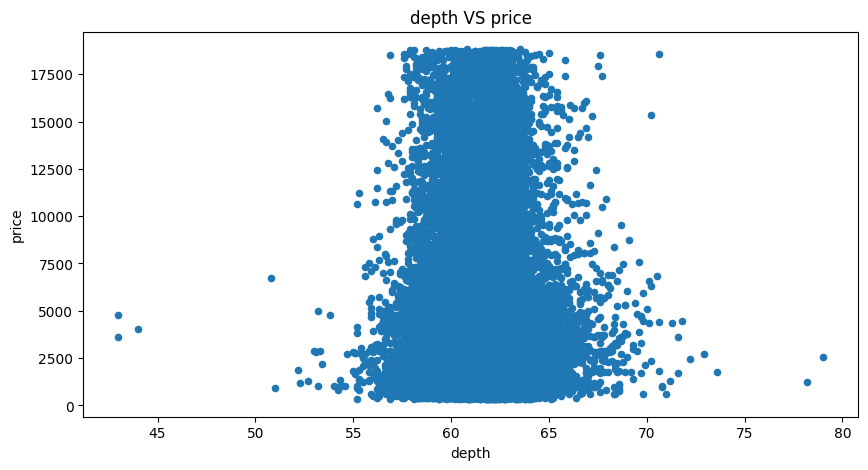

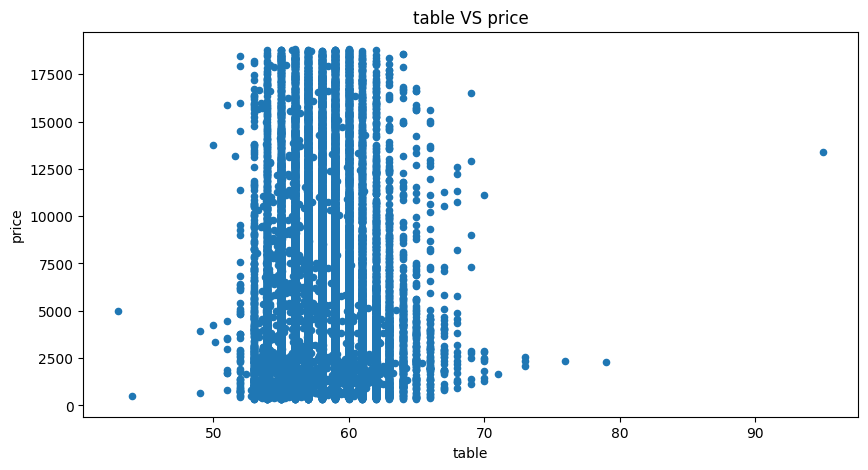

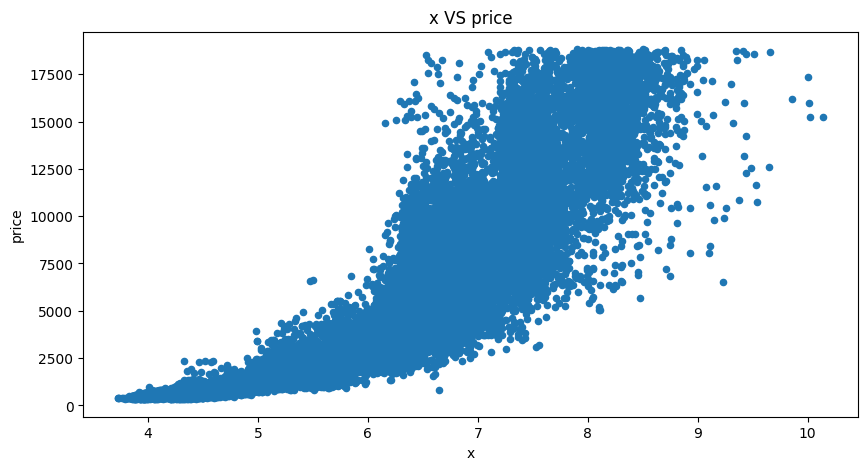

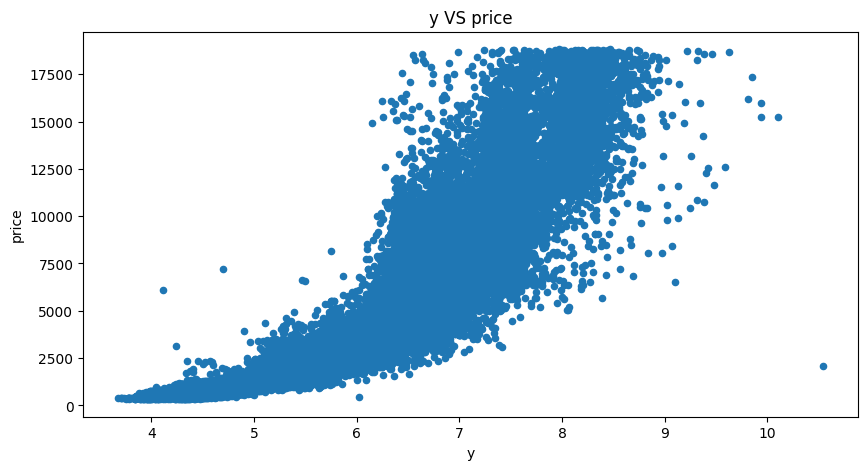

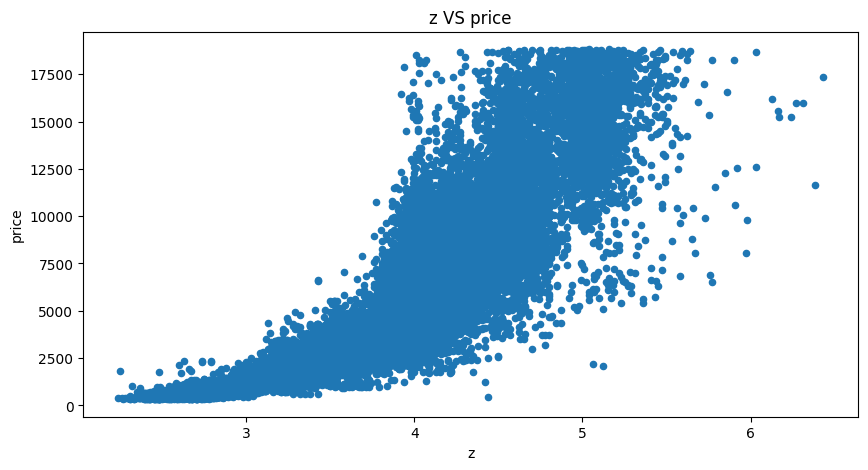

In [18]:
ContinuousCols=['carat', 'depth', 'table', 'x','y','z']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    data_new.plot.scatter(x=predictor, y='price', figsize=(10,5), title=predictor+" VS "+ 'price')

Outliers seen in the scatter charts
In the above scatter charts you can observe some of the points in x, y and z columns, which are in the lower range. There is a straight line on the left side.

These points will interfere with the model fit.

Hence they must be removed from the data.

In [ ]:
# Creating a data filter to remove outliers from data
DataFilter=(data_new['z']>2.06) & (data_new['z']<6.5)
data_new=data_new[DataFilter]

In [ ]:
#Import library called scipystats
corr()

In [ ]:
#Look at the scatterplots after outlier removal
ContinuousCols=['carat', 'depth', 'table', 'x','y','z']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    data_new.plot.scatter(x=predictor, y='price', figsize=(10,5), title=predictor+" VS "+ 'price')

In [19]:
# Calculating correlation matrix
ContinuousCols=['price','carat', 'depth', 'table', 'x','y','z']

# Creating the correlation matrix
CorrelationData=data_new[ContinuousCols].corr()
CorrelationData

,price,carat,depth,table,x,y,z
price,1.000000,0.921845,-0.011424,0.126696,0.887063,0.888460,0.882354
carat,0.921845,1.000000,0.027212,0.181277,0.978136,0.977011,0.977179
depth,-0.011424,0.027212,1.000000,-0.297608,-0.025531,-0.028635,0.095916
table,0.126696,0.181277,-0.297608,1.000000,0.195519,0.189201,0.154926
x,0.887063,0.978136,-0.025531,0.195519,1.000000,0.998435,0.991574
y,0.888460,0.977011,-0.028635,0.189201,0.998435,1.000000,0.991271
z,0.882354,0.977179,0.095916,0.154926,0.991574,0.991271,1.000000


negligible-very small to insignificant

In [20]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected like in this case
CorrelationData['price'][abs(CorrelationData['price']) > 0.2 ]

price    1.000000
carat    0.921845
x        0.887063
y        0.888460
z        0.882354
Name: price, dtype: float64

Relationships between categorical and continous data


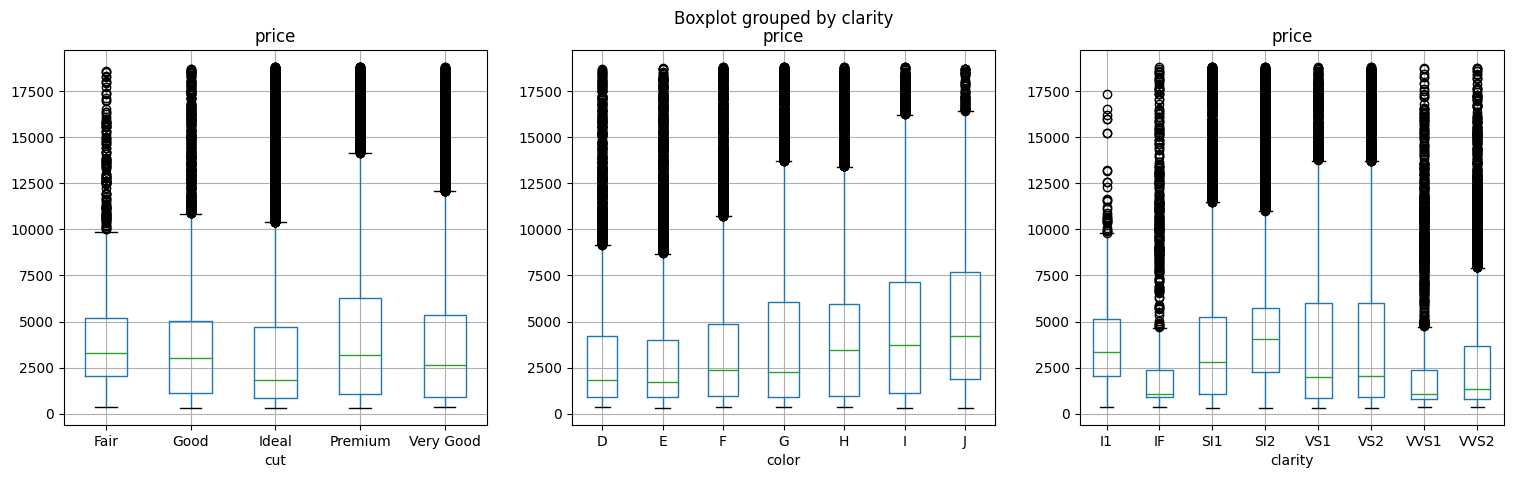

In [21]:
# Box plots for Categorical Target Variable "price" and continuous predictors
CategoricalColsList=['cut', 'color', 'clarity']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "price"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    data_new.boxplot(column='price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

Box-Plots interpretation

On the other hand if the distribution is different for each category(the boxes are not in same line!). 

It hints that these variables might be correlated with price.

In this data, all three categorical predictors looks correlated with the Target variable.

We confirm this by looking at the results of ANOVA test below

Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

Analysis of variance(ANOVA) is performed to check if there is any relationship between the given 
continuous and categorical variable

Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the 

numeric Target variable is same for all the groups in the categorical Predictor variable)

ANOVA Test result: Probability of H0 being true

In stating a hypothesis,
p-value(statistical credence)
thresholds of error = 5%, 1%

In [22]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [23]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['cut', 'color', 'clarity']
FunctionAnova(inpData=data_new, 
              TargetVariable='price', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

cut is correlated with price | P-Value: 2.41639003272117e-146
color is correlated with price | P-Value: 0.0
clarity is correlated with price | P-Value: 1.655076560414e-312


['cut', 'color', 'clarity']

The results of ANOVA confirm our visual analysis using box plots above.

All categorical variables are correlated with the Target variable. This is something we guessed by 

looking at the box plots

Selecting final predictors for Machine Learning

Based on the above tests, selecting the final columns for machine learning/predictive modeling

In [ ]:
SelectedColumns=['carat', 'x','y','z','cut', 'color', 'clarity']

# Selecting final columns
DataForML=data_new[SelectedColumns]
DataForML.head()
